In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config.config import K, Na, max_err, M_total, X, Y, T_central, R_total, L_total, M_test, X_test, Y_test, T_test, R_test, L_test
from src.star_class import StellarModel, Results

In [3]:
# We create an instance of the class StellarModel with the parameters of the test case
test = StellarModel(M_test, X_test, Y_test, T_test, R_test, L_test)
test.complete_model()
# test_initial_results = Results(test.R, test.P, test.T, test.L, test.M)
print("Total error: ", test.error)

Total error:  67.76104608765111


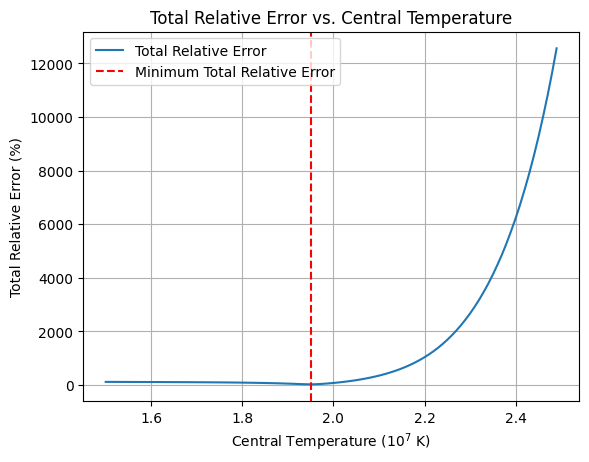

Central Temperature that minimizes the Total Relative Error (K): 1.9500000000000004
Minimum Total Relative Error (%): 16.820270236352307
Total error:  16.820270236352307


In [5]:
# We build the range of values for the central temperature to optimize the calculation
T_values = np.arange(test.T_central - 0.5, test.T_central + 0.5, 0.01)
test.optimal_temperature_calculation(T_values, plot=True)
print("Total error: ", test.error)

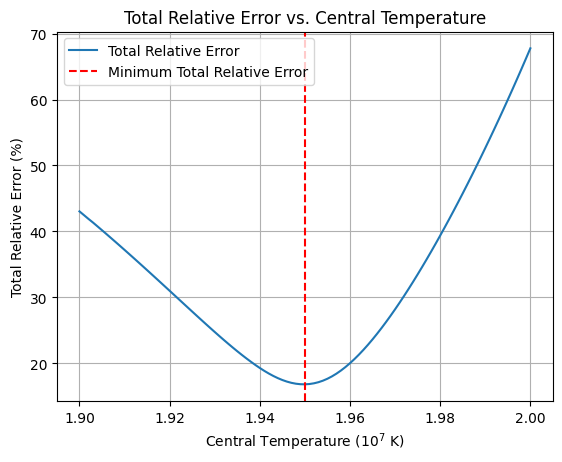

Central Temperature that minimizes the Total Relative Error (K): 1.9499999999999948
Minimum Total Relative Error (%): 16.820270236352233
Total error:  16.820270236352233


In [7]:
# We make a thinner range of values for the central temperature to optimize the calculation
T_values = np.arange(test.T_central - 0.05, test.T_central + 0.05, 0.001)
test.optimal_temperature_calculation(T_values, plot=True)
# test_optimal_temperature_results = Results(test.R, test.P, test.T, test.L, test.M)
print("Total error: ", test.error)

In [29]:
# We create a grid of values for the total luminosity and the total radius to optimize the calculation
L_values = np.arange(test.L_total - 0.5, test.L_total + 0.5, 0.1)
R_values = np.arange(test.R_total - 0.5, test.R_total + 0.5, 0.1)

In [33]:
test.R_total, test.L_total

(10.3, 70.19999999999993)

In [32]:
matrix_error = test.optimal_grid_calculation(R_values, L_values, T_values)
test.plot_matrix_error(matrix_error, R_values, L_values, plot=True)

KeyboardInterrupt: 

Lo de abajo no

In [ ]:
# We will create a star with the following parameters
star = StellarModel(M_total, X, Y, T_central, R_total, L_total)
T_values = np.arange(star.T_central - 0.5, star.T_central + 0.5, 0.01)
star.optimal_temperature_calculation(T_values, plot=True)
T_values = np.arange(star.T_central - 0.05, star.T_central + 0.05, 0.001)
star.optimal_temperature_calculation(T_values, plot=True)

In [ ]:
R_values = np.linspace(11.52, 11.78, 11)
L_values = np.linspace(44.25, 46.75, 11)
matrix_error = star.optimal_grid_calculation(R_values, L_values, T_values)
star.plot_matrix_error(matrix_error, R_values, L_values, "contour")
star.plot_matrix_error(matrix_error, R_values, L_values, "pixels")

In [ ]:
print(L_values)
print(R_values)

In [ ]:
# Identificar las 4 celdas centrales
R_center_range = (R_values[3], R_values[7])
L_center_range = (L_values[3], L_values[7])

# Crear un grid más fino en las celdas centrales con un número arbitrario de puntos, por ejemplo 11 puntos también
R_fine = np.linspace(R_center_range[0], R_center_range[1], 11)
L_fine = np.linspace(L_center_range[0], L_center_range[1], 11)

matrix_error = star.optimal_grid_calculation(R_fine, L_fine, T_values)

In [ ]:
star.plot_matrix_error(matrix_error, R_values, L_values, "contour")
star.plot_matrix_error(matrix_error, R_values, L_values, "pixels")

In [ ]:
T_values = np.arange(star.T_central - 0.05, star.T_central + 0.05, 0.0001)
star.optimal_temperature_calculation(T_values, True)

In [ ]:
star.error

In [ ]:
# Crear un DataFrame con un diccionario donde las claves son los nombres de las columnas
df = pd.DataFrame({
    'r': star.R,
    'P': star.P,
    'T': star.T,
    'L': star.L,
    'M': star.M,
})

# Usar .style.format para especificar formatos individuales
formatted_df = df.style.format({
    'r': "{:.5f}",  # Dos decimales para 'r'
    'P': "{:,.7f}",  # Sin decimales para 'P', con comas para los millares
    'T': "{:.7f}",  # Tres decimales para 'T'
    'L': "{:.6f}",  # Cinco decimales para 'L'
    'M': "{:.6f}"   # Ocho decimales para 'M'
})

# Mostrar el DataFrame
# formatted_df

In [ ]:
# We show the whole DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

In [ ]:
# we make the plot of the complete model of the star, R vs M, R vs L, R vs T, R vs P
plt.figure()
plt.plot(star.R, star.M)
plt.xlabel('Radius (R)')
plt.ylabel('Mass (M)')
plt.title('Mass vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.L)
plt.xlabel('Radius (R)')
plt.ylabel('Luminosity (L)')
plt.title('Luminosity vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.T)
plt.xlabel('Radius (R)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.P)
plt.xlabel('Radius (R)')
plt.ylabel('Pressure (P)')
plt.title('Pressure vs. Radius')
plt.grid()
plt.show()